In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# determining the dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# preprocessing the data frame.

In [6]:
# determining the null values.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# describing the statistical summary.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# grouping the entries by class.
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


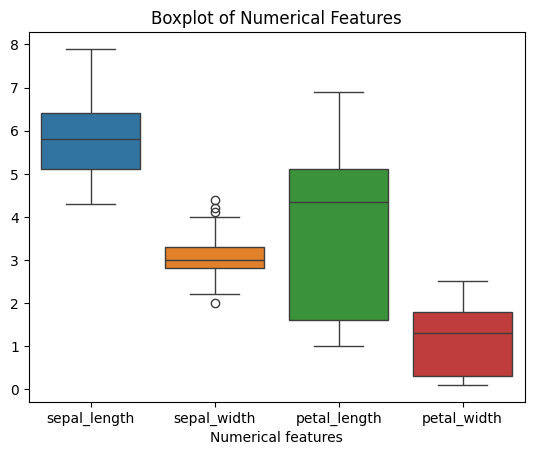

In [22]:
# creating boxplot for each numerical feature.
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Numerical features')
plt.show()

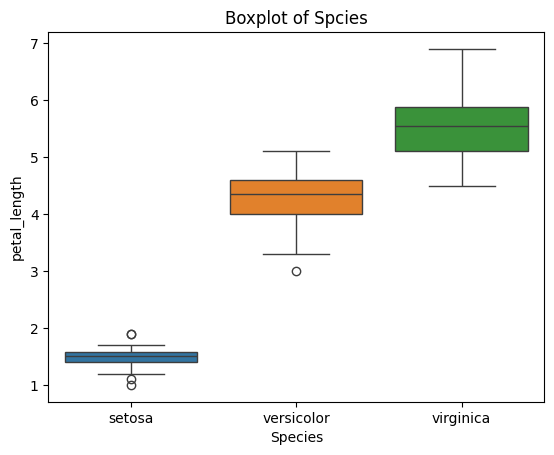

In [26]:
# Boxplot for classes feature.
sns.boxplot(data=df, x='species', y='petal_length', hue='species')
plt.title('Boxplot of Petal Length by Spcies')
plt.xlabel('Species')
plt.show()

In [36]:
# listing down numerical features.
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorial_features = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical features are:', numerical_features)
print('Categorical features are:', categorial_features)

Numerical features are: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Categorical features are: ['species']


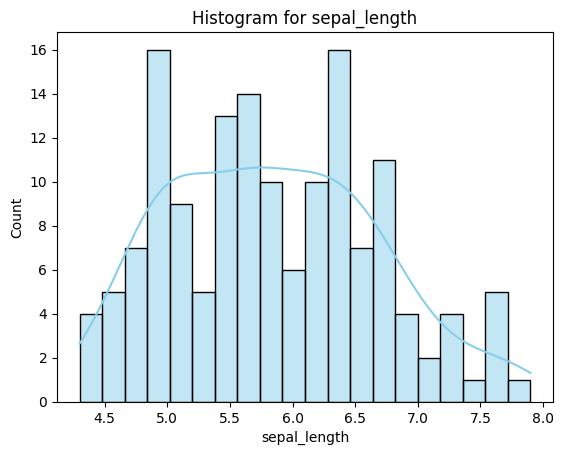

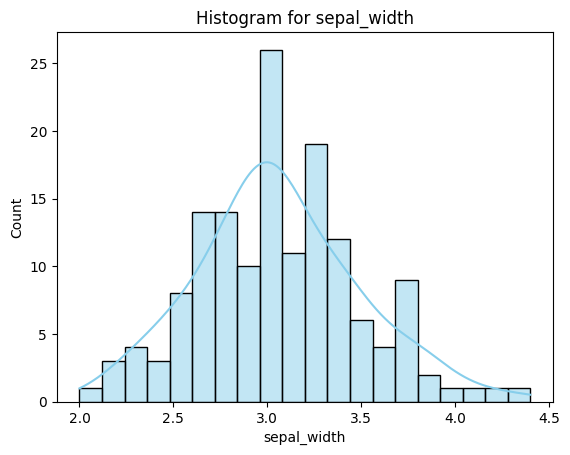

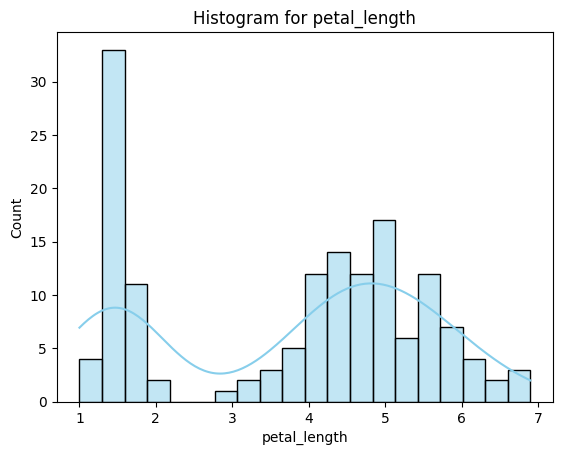

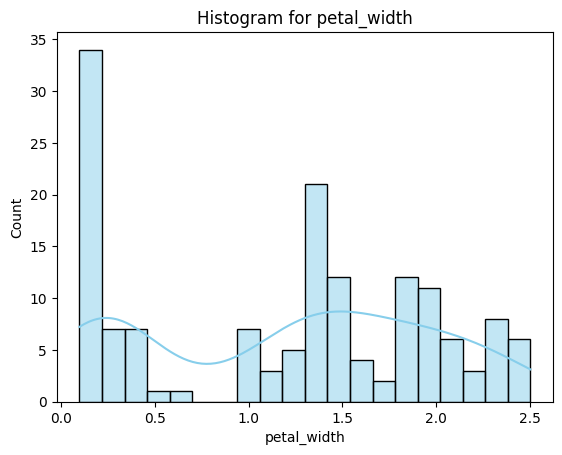

In [45]:
# histogram for all numerical values.
for feature in numerical_features:
    sns.histplot(data=df, x=feature, bins=20, color='skyblue', kde=True)
    plt.title('Histogram for ' + feature)
    plt.xlabel(feature)
    plt.show()

In [59]:
# identifying the outliers by applying mathematical calculations.
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature]  > upper_bound)].shape[0]
    print(f"{feature} -> Outliers: {outliers}")

sepal_length -> Outliers: 0
sepal_width -> Outliers: 4
petal_length -> Outliers: 0
petal_width -> Outliers: 0
